In [20]:
# Module
import glob
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# ESP32 report log
esp32_report_logs = {}
for n in [8, 14, 20, 26]:
    report_log_file = glob.glob(f'./results/*resnet{n}/creport*.json')
    print(report_log_file)
    with open(report_log_file[0], "r") as f:
        report_log = json.load(f)
    esp32_report_logs[str(n)] = pd.DataFrame({"accuracy": [report_log["accuracy"]], "f1-score": [report_log["macro avg"]["f1-score"]]})
esp32_report_logs["8"], esp32_report_logs["14"]

['./results/res-20240529-092228-resnet8/creport-20240529-092228.json']
['./results/res-20240531-200256-resnet14/creport-20240531-200256.json']
['./results/res-20240603-191551-resnet20/creport-20240603-191551.json']
['./results/res-20240607-175831-resnet26/creport-20240607-175831.json']


(   accuracy  f1-score
 0    0.8429  0.842435,
    accuracy  f1-score
 0    0.8601  0.859997)

In [22]:
# RPi Tflite report log
rpi_tflite_report_logs = {}
for n in [8, 14, 20, 26]:
    report_log_file = glob.glob(f'./results/*resnet{n}*tflite-pi/creport*.json')
    print(report_log_file)
    with open(report_log_file[0], "r") as f:
        report_log = json.load(f)
    rpi_tflite_report_logs[str(n)] = pd.DataFrame({"accuracy": [report_log["accuracy"]], "f1-score": [report_log["macro avg"]["f1-score"]]})
rpi_tflite_report_logs["8"], rpi_tflite_report_logs["14"]

['./results/res-20240611-065149-resnet8-tflite-pi/creport-20240611-065149.json']
['./results/res-20240611-070204-resnet14-tflite-pi/creport-20240611-070204.json']
['./results/res-20240611-071142-resnet20-tflite-pi/creport-20240611-071142.json']
['./results/res-20240611-072202-resnet26-tflite-pi/creport-20240611-072202.json']


(   accuracy  f1-score
 0    0.8436  0.843094,
    accuracy  f1-score
 0    0.8598  0.859606)

In [23]:
# RPi Tf report log
rpi_tf_report_logs = {}
for n in [8, 14, 20, 26]:
    report_log_file = glob.glob(f'./results/*resnet{n}*tf-pi/creport*.json')
    print(report_log_file)
    with open(report_log_file[0], "r") as f:
        report_log = json.load(f)
    rpi_tf_report_logs[str(n)] = pd.DataFrame({"accuracy": [report_log["accuracy"]], "f1-score": [report_log["macro avg"]["f1-score"]]})
rpi_tf_report_logs["8"], rpi_tf_report_logs["14"]

['./results/res-20240612-192912-resnet8-tf-pi/creport-20240612-192912.json']
['./results/res-20240612-203957-resnet14-tf-pi/creport-20240612-203957.json']
['./results/res-20240612-222009-resnet20-tf-pi/creport-20240612-222009.json']
['./results/res-20240613-211345-resnet26-tf-pi/creport-20240613-211345.json']


(   accuracy  f1-score
 0    0.8442   0.84359,
    accuracy  f1-score
 0    0.8597  0.859572)

In [24]:
esp32_report_logs["8"].describe(), rpi_tflite_report_logs["8"].describe(), rpi_tf_report_logs["8"].describe()

(       accuracy  f1-score
 count    1.0000  1.000000
 mean     0.8429  0.842435
 std         NaN       NaN
 min      0.8429  0.842435
 25%      0.8429  0.842435
 50%      0.8429  0.842435
 75%      0.8429  0.842435
 max      0.8429  0.842435,
        accuracy  f1-score
 count    1.0000  1.000000
 mean     0.8436  0.843094
 std         NaN       NaN
 min      0.8436  0.843094
 25%      0.8436  0.843094
 50%      0.8436  0.843094
 75%      0.8436  0.843094
 max      0.8436  0.843094,
        accuracy  f1-score
 count    1.0000   1.00000
 mean     0.8442   0.84359
 std         NaN       NaN
 min      0.8442   0.84359
 25%      0.8442   0.84359
 50%      0.8442   0.84359
 75%      0.8442   0.84359
 max      0.8442   0.84359)

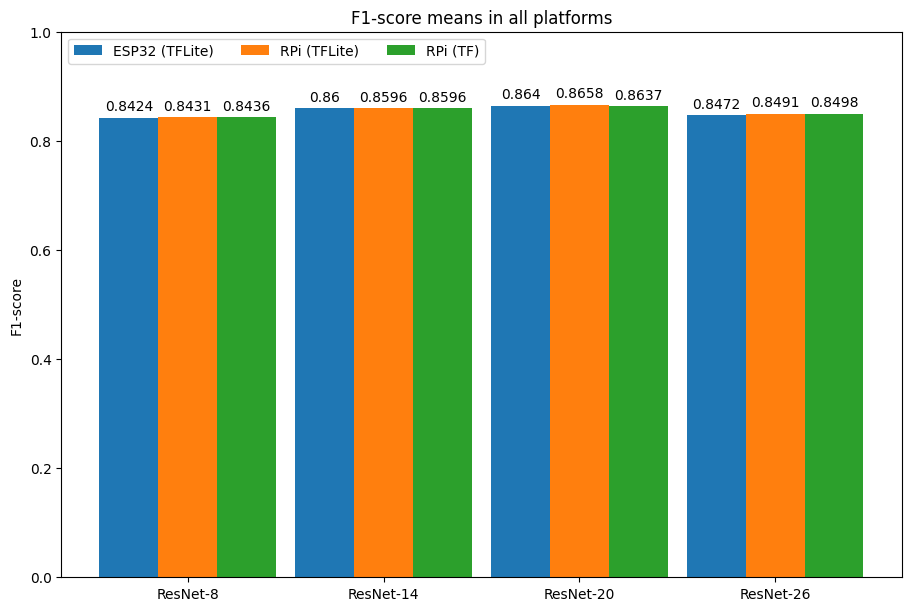

In [25]:
resnets = ("ResNet-8", "ResNet-14", "ResNet-20", "ResNet-26")

f1score = {}
f1score['ESP32 (TFLite)'] = [round(esp32_report_logs[str(n)]["f1-score"].mean(), 4) for n in [8, 14, 20, 26]]
f1score['RPi (TFLite)'] = [round(rpi_tflite_report_logs[str(n)]["f1-score"].mean(), 4) for n in [8, 14, 20, 26]]
f1score['RPi (TF)'] = [round(rpi_tf_report_logs[str(n)]["f1-score"].mean(), 4) for n in [8, 14, 20, 26]]

x = np.arange(len(resnets))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(9, 6))

for attribute, measurement in f1score.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1-score')
ax.set_title('F1-score means in all platforms')
ax.set_xticks(x + width, resnets)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()

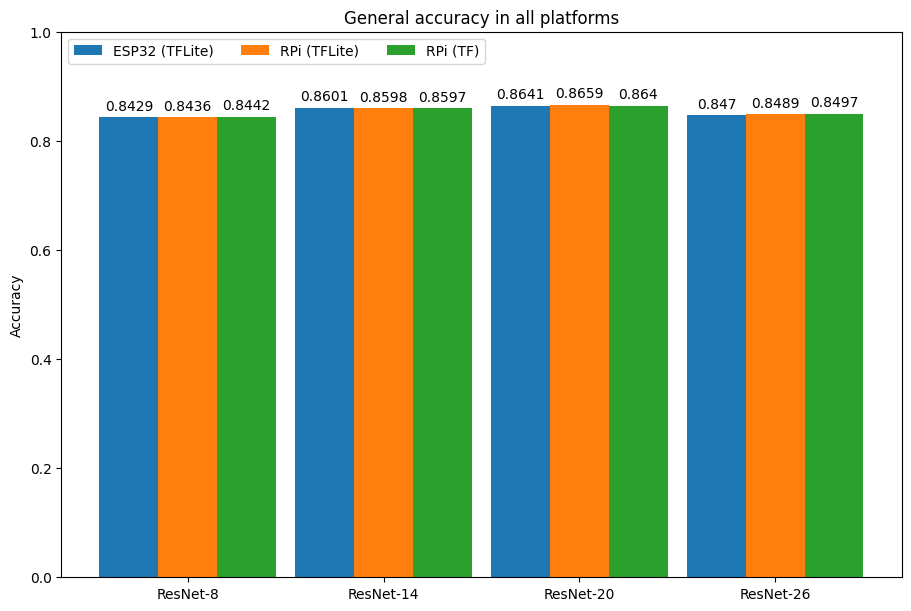

In [27]:
resnets = ("ResNet-8", "ResNet-14", "ResNet-20", "ResNet-26")

f1score = {}
f1score['ESP32 (TFLite)'] = [esp32_report_logs[str(n)]["accuracy"].mean() for n in [8, 14, 20, 26]]
f1score['RPi (TFLite)'] = [rpi_tflite_report_logs[str(n)]["accuracy"].mean() for n in [8, 14, 20, 26]]
f1score['RPi (TF)'] = [rpi_tf_report_logs[str(n)]["accuracy"].mean() for n in [8, 14, 20, 26]]

x = np.arange(len(resnets))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(9, 6))

for attribute, measurement in f1score.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('General accuracy in all platforms')
ax.set_xticks(x + width, resnets)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()